In [ ]:
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/My\ Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
BIG_TITLE="CNN raw movement"

In [ ]:
### TIME WINDOWS
w1=512
w2=768
W1=w1
W2=w2

In [ ]:
### LIBRARIES

import tensorflow as tf
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy
import datetime
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Embedding
from keras.layers import BatchNormalization, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
import tensorflow as tf
import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import time
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas
import os

# Remove some unwanted warnings
import logging
logging.getLogger('tensorflow').disabled = True 
from scipy.signal import butter, lfilter
import pywt
import pandas as pd
import numpy as np
import random
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy
import scipy
import scipy.signal
from scipy import fft
### LIBRARIES

import tensorflow as tf
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy
import datetime
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Embedding
from keras.layers import BatchNormalization, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
import tensorflow as tf
import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import time
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy
import pandas
import os

import os
import sys

import pandas as pd
import pandas
import numpy as np

import pywt
import scipy.io as spio
from scipy.stats import entropy
from collections import Counter

from sklearn import svm
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

import timeit

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Embedding
from keras.layers import LSTM, BatchNormalization, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
import tensorflow as tf
import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from numpy import hstack, vstack, dstack
import numpy as np


In [ ]:
def load_signal(k):  #where k is the file name
    data = sio.loadmat(str(k))  
    ###deleting EOGs
    signal_raw= numpy.delete(data["signal"], obj= [63,62,61,60,59,58], axis=0)
    ###deleting 0s:
    signal_raw_trans= numpy.transpose(signal_raw)
    ind=[]
    for cx, c in enumerate(signal_raw_trans):
        if len(c) -  numpy.count_nonzero(c) <=5:
            continue
        else:
            ind.append(cx)
    g= numpy.delete(signal_raw_trans, obj= ind, axis=0)
    signal_raw_trans_clean=numpy.transpose(g)
    
    ###clean memory
    del data
    del signal_raw
    del signal_raw_trans
    del g

    return(signal_raw_trans_clean)

In [ ]:
### cleaned code names
def cleaned_code_names(k):# k=file name
    data = sio.loadmat(str(k)) 
    events= data["header"]["event_codes"]
    EVENTS=[]
    for i in events:
        for e in i:
            for j in e:
                for h in j:
                    if len(str(h))>2:
                        EVENTS.append(h)
    EVENTS=numpy.array(EVENTS)
    
    del data
    del events
    
    return EVENTS

In [ ]:
### cleaned event code
def event_Code(k): # k=file name
    data = sio.loadmat(str(k)) 
    
    labels= str(data["events"]["codes"]).split()
    
    l=[]
    for g in labels:
        for i in g:
            if i.isnumeric():
                l.append(i)
        else:
            l.append(",")
    #cleaning labels 
    l2=[]
    g=""
    for j in l:
        if j.isnumeric():
            g+=j
        elif len(g)<1:
            continue
        else:
            l2.append(int(g))
            g=""
    
    del data
    del labels
    del l
    del g
    
    return l2

### cleaned event position
def event_Position(k):# k=file name
    data = sio.loadmat(str(k)) 
    indices_signal_matrix= str(data["events"]["positions"]).split()
    #cleaning indices_signal_matrix 
    l3=[]
    for g in indices_signal_matrix:
        for i in g:
            if i.isnumeric():
                l3.append(i)
        else:
            l3.append(",")

    l4=[]
    g=""
    for j in l3:
        if j.isnumeric():
            g+=j
        elif len(g)<1:
            continue
        else:
            l4.append(int(g))
            g=""
    l4=l4[:-1]#array of i
    
    del data
    del indices_signal_matrix
    del l3
    del g
    
    return l4

In [ ]:
#indexes of each events within signals
def indexes_event_signals(k):
    data = sio.loadmat(str(k)) 
    EVENTS = cleaned_code_names(k)
    event_codes= event_Code(k)
    dico_indexes={}

    for event in EVENTS:
        indexes_=[]
        for ig, g in enumerate(event_codes):
            if g == event:
                indexes_.append(ig)
        dico_indexes[event]= indexes_
    
    del data
    del EVENTS
    del event_codes
    del indexes_
    
    return dico_indexes

In [ ]:
def start_indexes(k, event):# k= file name, starting_event= code of grasp onset, ending_event:code of grasp offset
    indexes=indexes_event_signals(k)
    event_positions= event_Position(k)
    event_indexes=[]
    
    for h in indexes[event]:
        event_indexes.append(event_positions[h])
    
    del indexes
    del event_positions
    
    return event_indexes

In [ ]:
#signals of movement types (signal of split() function)


def EVENT_SIGNALS(k, EVENT, W1, W2): #starting_event= starting event of the movement, ending_event:ending event of the movement
    #window_size2=int(window_size/2)
    signal= load_signal(str(k)) 
    event_indexs= start_indexes(str(k), EVENT)

    movement_signals=[]
    #print(event_indexs)
    for i in event_indexs:#
        for channel in signal:
            i= int(i)
            #print(i+(window_size2))
            if i-W1>0:
                movement_signals.append(numpy.array(channel[i-W1:i+W2]))# window size would be are most litte event, event would be the ending event
            #print(len(channel[i-window_size2:i+(window_size2+1)]))
            else:
                continue
    del signal
    del event_indexs
    
    return movement_signals


In [ ]:
def create_tensor(data,W1:int, W2,nb_channels:int):
    window_size= W1+W2
    positions_split=[]

    for j in range(0,len(data),nb_channels):
        positions_split.append(j)

    positions_split.append(len(data))
    #print(positions_split)

    all_events=[]
    for i in range(0,len(positions_split)-1):
        #print(i)
        one_event=[]
        for h in range(positions_split[i],positions_split[i+1]):
            #print(h)
            data_shaped=data[h]
            if (len(one_event)==0.0):
                one_event=data_shaped
            else:
                one_event=numpy.vstack((one_event, data_shaped))
        if (len(all_events)==0.0):
                all_events=one_event.reshape(1,nb_channels,window_size)
        else:
                all_events=numpy.vstack((all_events, one_event.reshape(1,nb_channels,window_size)))
        #print(all_events.shape)
    return(all_events)

In [ ]:
import random
import numpy as np

def random_shuffle(final_TENSOR, labels):
    random_indexes_tens= random.sample(range(0, final_TENSOR.shape[0]), final_TENSOR.shape[0])
    event_tensors= [t for t in range(final_TENSOR.shape[0])]#indexes of tensor
    
    #print(random_indexes_tens)
    #print(event_tensors)

    SHUFFLED_TENSOR=[] 
    LABELS_SHUFFLED=[]
    
    for i in event_tensors:
        target_position=random_indexes_tens[i]
        SHUFFLED_TENSOR.append(final_TENSOR[target_position,:,:])
        LABELS_SHUFFLED.append(labels[target_position])

    SHUFFLED_TENSOR=numpy.array(SHUFFLED_TENSOR)
    #SHUFFLED_TENSOR= np.transpose(SHUFFLED_TENSOR, (1,2,0))
    return SHUFFLED_TENSOR, LABELS_SHUFFLED

In [ ]:
# Remove some unwanted warnings
import logging
logging.getLogger('tensorflow').disabled = True 

def add_data(W1:int, W2:int,k:str,event_label:str,EVENT,nb_channels:int):
    #window_size=W1+W2
    partial_TENSOR=[]
    partial_LABEL=[]
    time00 = datetime.datetime.now()
    #for i in k:
    time1 = datetime.datetime.now()
    file='G'+k+'.mat'
    print('processing '+file)
    data=EVENT_SIGNALS(k=file, EVENT=EVENT, W1=W1, W2=W2 )
    data_transformed=create_tensor(data=data,W1=W1, W2=W2,nb_channels=nb_channels)
    label= event_label*data_transformed.shape[0]
    
    if (len(partial_TENSOR)==0.0):
        partial_TENSOR=data_transformed
        partial_LABEL=label
    else:
        partial_TENSOR=numpy.vstack((partial_TENSOR, data_transformed))
        partial_LABEL=partial_LABEL+label
    print('New shape Tensor ', partial_TENSOR.shape)
    print('New shape label ', len(partial_LABEL))
    time2 = datetime.datetime.now()
    elapsedTime = time2 - time1
    print('Minutes it took',elapsedTime)
        
    time01 = datetime.datetime.now()
    elapsedTime0 = time01 - time00
    print('Total time',elapsedTime0)

    return(partial_TENSOR, partial_LABEL) 

In [ ]:
import random
import numpy as np

def random_shuffle(FINAL_TENSOR, labels):
    random_indexes_tens= random.sample(range(0, FINAL_TENSOR.shape[0]), FINAL_TENSOR.shape[0])
    event_tensors= [t for t in range(FINAL_TENSOR.shape[0])]#indexes of tensor
    
    #print(random_indexes_tens)
    #print(event_tensors)

    SHUFFLED_TENSOR=[] 
    LABELS_SHUFFLED=[]
    
    for i in event_tensors:
        target_position=random_indexes_tens[i]
        SHUFFLED_TENSOR.append(FINAL_TENSOR[target_position,:,:])
        LABELS_SHUFFLED.append(labels[target_position])

    SHUFFLED_TENSOR=numpy.array(SHUFFLED_TENSOR)
    #SHUFFLED_TENSOR= np.transpose(SHUFFLED_TENSOR, (1,2,0))
    return SHUFFLED_TENSOR, LABELS_SHUFFLED

In [ ]:
### Here we set our CNN
from keras.callbacks import ModelCheckpoint, EarlyStopping

def run_model():
  nb_channels=58
  window_size=W1+W2
  model = Sequential()
  seed_value=333        
    
    #####
  model.add(Conv2D(filters = 64, kernel_size = (7,7), padding = "same", activation = "elu", input_shape = (nb_channels,window_size,1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size = (3,3)))
  model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = "same", activation = "elu"))
#model.add(Activation('elu'))# Is this needed? Try without it
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size = (3,3)))
  model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "same", activation = "elu"))
#model.add(Activation('elu'))#Is this needed? Try without it
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size = (3,3)))
  model.add(Flatten())
  model.add(Dropout(0.2)) #seed=seed_value)
  model.add(Dense(32, activation = "elu"))
  #model.add(Activation('elu'))#Is this needed? Try without it
  model.add(BatchNormalization())
#model.add(Dropout(0.2))
  model.add(Dense(1, activation = "sigmoid"))#try softax


  adam = Adam(lr = 0.0001)

  model.compile(optimizer = adam, loss = "binary_crossentropy", metrics = ['accuracy','mse']) #tf.math.reduce_std(x, 1), ['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'cosine_proximity']
# simple early stopping
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)# add "patience=200" if early stopping is done too soon
  return model, es, adam
model, es, adam= run_model()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
with open("model summary "+str(BIG_TITLE)+'.pdf', 'w') as f:
  model.summary(print_fn=lambda x: f.write(x + '\n'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 58, 1280, 64)      3200      
_________________________________________________________________
batch_normalization (BatchNo (None, 58, 1280, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 19, 426, 64)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 19, 426, 64)       102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 19, 426, 64)       256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 142, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 142, 64)        3

In [ ]:
import matplotlib.pyplot as pyplot
import csv

def plot_training_history(history, TITLE):
    acc = history.history['accuracy'] #this does not work, to do
    loss = history.history['loss']
    mse = history.history['mse']
    epochs = range(len(acc))
 
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 1, 1)
    plt.plot(epochs, acc, 'g', label='Training accuracy',linewidth=2) #'g'
    plt.plot(epochs, loss, 'r', label='Training loss',linewidth=2)
    plt.plot(epochs, mse, 'b--', label='MSE',linewidth=2)
    #plt.plot(epochs, ACC, 'g', label='Test acc',linewidth=2)
    plt.title(TITLE, fontsize=10)
    plt.xlabel('Number of epochs', fontsize=8)
    plt.ylabel('Performance indicator', fontsize=8)
    plt.legend()
    
    plt.savefig(str(TITLE)+'.png', bbox_inches='tight')
    plt.savefig(str(TITLE)+'.pdf', bbox_inches='tight')
    #plt.show()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:13.955328
Total time 0:00:13.956559
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.332410
Total time 0:00:12.332522
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.262004
Total time 0:00:12.262248
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.195636
Total time 0:00:12.195704
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:13.613060
Total time 0:00:13.613156
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.934945
Total time 0:00:11.935787
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:12.061205
Total time 0:00:12.061307
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:12.0

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:11.686654
Total time 0:00:11.686752
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:11.657359
Total time 0:00:11.657490
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:11.575888
Total time 0:00:11.576025
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:11.686122
Total time 0:00:11.686249
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.269934
Total time 0:00:11.270046
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.130975
Total time 0:00:11.131438
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.210531
Total time 0:00:11.210630
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.262846
Total time 0:

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:11.878626
Total time 0:00:11.878694
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:11.811708
Total time 0:00:11.811795
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:11.856016
Total time 0:00:11.856086
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.028768
Total time 0:00:12.028872
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.425814
Total time 0:00:11.425925
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.317449
Total time 0:00:11.317520
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.428951
Total time 0:00:11.429015
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.280111
Total time 0:

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.331655
Total time 0:00:12.331773
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.275846
Total time 0:00:12.275922
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.310294
Total time 0:00:12.310392
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.231842
Total time 0:00:12.231901
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.880769
Total time 0:00:11.880845
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.832054
Total time 0:00:11.832128
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.691148
Total time 0:00:11.691245
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.855960
Total time 0:

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.177350
Total time 0:00:12.177422
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.295966
Total time 0:00:12.296062
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.217973
Total time 0:00:12.218039
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.437460
Total time 0:00:12.437533
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.662435
Total time 0:00:11.662511
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.710148
Total time 0:00:11.710216
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.896337
Total time 0:00:11.896477
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.798027
Total time 0:

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.367103
Total time 0:00:12.367213
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.481338
Total time 0:00:12.482958
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.337497
Total time 0:00:12.337671
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.423819
Total time 0:00:12.423890
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.909754
Total time 0:00:11.909861
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.965735
Total time 0:00:11.965807
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.724033
Total time 0:00:11.724100
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.686249
Total time 0:

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.198391
Total time 0:00:12.199897
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.151404
Total time 0:00:12.151507
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.025934
Total time 0:00:12.026040
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.160862
Total time 0:00:12.160951
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.728869
Total time 0:00:11.728931
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.672909
Total time 0:00:11.673011
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.743361
Total time 0:00:11.743531
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.783719
Total time 0:

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:11.835098
Total time 0:00:11.835172
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.105542
Total time 0:00:12.105627
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:11.918855
Total time 0:00:11.918932
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.012425
Total time 0:00:12.012507
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.542184
Total time 0:00:11.542328
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.558846
Total time 0:00:11.558962
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.762947
Total time 0:00:11.763080
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.631238
Total time 0:

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.037766
Total time 0:00:12.037845
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.154891
Total time 0:00:12.154991
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.105412
Total time 0:00:12.105480
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.015034
Total time 0:00:12.015163
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.633685
Total time 0:00:11.633767
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.711975
Total time 0:00:11.712063
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.677066
Total time 0:00:11.677142
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.548758
Total time 0:

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:11.991412
Total time 0:00:11.992657
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:11.978344
Total time 0:00:11.979893
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:11.984132
Total time 0:00:11.984326
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.000095
Total time 0:00:12.000183
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.575974
Total time 0:00:11.576051
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.424703
Total time 0:00:11.424771
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.430565
Total time 0:00:11.430658
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.503188
Total time 0:

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:11.784368
Total time 0:00:11.784547
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:11.939733
Total time 0:00:11.939806
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:11.741201
Total time 0:00:11.741268
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:11.821212
Total time 0:00:11.821295
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.223910
Total time 0:00:11.224009
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.191561
Total time 0:00:11.191627
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.308937
Total time 0:00:11.309009
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.301172
Total time 0:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


processing G11.mat
New shape Tensor  (80, 58, 1280)
New shape label  80
Minutes it took 0:00:13.803581
Total time 0:00:13.803744
processing G11.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:13.776779
Total time 0:00:13.776862
processing G11.mat
New shape Tensor  (80, 58, 1280)
New shape label  80
Minutes it took 0:00:13.777194
Total time 0:00:13.777438
processing G11.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:13.921262
Total time 0:00:13.921327
TEST_TENSOR shape: (318, 58, 1280, 1)
y test length: 318
10/10 [==============================] - 0s 25ms/step - loss: 0.1105 - accuracy: 0.9686 - mse: 0.0277
[[154   5]
 [  5 154]]
Accuracy : 96.855346
Sensitivity :96.855346
Specificity :96.855346
Precision :50.000000
processing G01.mat


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:11.972953
Total time 0:00:11.973040
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:11.936084
Total time 0:00:11.936156
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.046864
Total time 0:00:12.046949
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:11.881952
Total time 0:00:11.882049
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.522072
Total time 0:00:11.522149
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.517440
Total time 0:00:11.517786
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.464110
Total time 0:00:11.464185
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.516026
Total time 0:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


processing G12.mat
New shape Tensor  (80, 58, 1280)
New shape label  80
Minutes it took 0:00:13.115520
Total time 0:00:13.115612
processing G12.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:13.089494
Total time 0:00:13.089586
processing G12.mat
New shape Tensor  (80, 58, 1280)
New shape label  80
Minutes it took 0:00:13.016493
Total time 0:00:13.016582
processing G12.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:13.009331
Total time 0:00:13.009447
TEST_TENSOR shape: (318, 58, 1280, 1)
y test length: 318
10/10 [==============================] - 0s 25ms/step - loss: 0.1238 - accuracy: 0.9654 - mse: 0.0301
[[149  10]
 [  1 158]]
Accuracy : 96.540881
Sensitivity :93.710692
Specificity :99.371069
Precision :48.534202
processing G01.mat


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.016295
Total time 0:00:12.016372
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.028487
Total time 0:00:12.029418
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.276190
Total time 0:00:12.276356
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.485135
Total time 0:00:12.485217
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:12.037506
Total time 0:00:12.037610
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:12.124125
Total time 0:00:12.124249
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.988945
Total time 0:00:11.989027
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.747320
Total time 0:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


processing G13.mat
New shape Tensor  (78, 58, 1280)
New shape label  78
Minutes it took 0:00:13.514953
Total time 0:00:13.515081
processing G13.mat
New shape Tensor  (78, 58, 1280)
New shape label  78
Minutes it took 0:00:13.352915
Total time 0:00:13.353016
processing G13.mat
New shape Tensor  (78, 58, 1280)
New shape label  78
Minutes it took 0:00:13.403728
Total time 0:00:13.403812
processing G13.mat
New shape Tensor  (78, 58, 1280)
New shape label  78
Minutes it took 0:00:14.790832
Total time 0:00:14.790909
TEST_TENSOR shape: (312, 58, 1280, 1)
y test length: 312
10/10 [==============================] - 0s 26ms/step - loss: 0.1057 - accuracy: 0.9712 - mse: 0.0263
[[150   6]
 [  3 153]]
Accuracy : 97.115385
Sensitivity :96.153846
Specificity :98.076923
Precision :49.504950
processing G01.mat


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.271729
Total time 0:00:12.271808
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.271008
Total time 0:00:12.271091
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.149339
Total time 0:00:12.149413
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.223465
Total time 0:00:12.223547
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.849751
Total time 0:00:11.849824
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.847798
Total time 0:00:11.847888
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.948061
Total time 0:00:11.948151
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.867991
Total time 0:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


processing G14.mat
New shape Tensor  (69, 58, 1280)
New shape label  69
Minutes it took 0:00:11.092764
Total time 0:00:11.092920
processing G14.mat
New shape Tensor  (70, 58, 1280)
New shape label  70
Minutes it took 0:00:10.978237
Total time 0:00:10.978318
processing G14.mat
New shape Tensor  (69, 58, 1280)
New shape label  69
Minutes it took 0:00:10.868095
Total time 0:00:10.868960
processing G14.mat
New shape Tensor  (70, 58, 1280)
New shape label  70
Minutes it took 0:00:10.940444
Total time 0:00:10.941327
TEST_TENSOR shape: (278, 58, 1280, 1)
y test length: 278
9/9 [==============================] - 0s 38ms/step - loss: 0.3136 - accuracy: 0.8705 - mse: 0.0925
[[104  35]
 [  1 138]]
Accuracy : 87.050360
Sensitivity :74.820144
Specificity :99.280576
Precision :42.975207
processing G01.mat


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.871991
Total time 0:00:12.872110
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.764857
Total time 0:00:12.764948
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.927838
Total time 0:00:12.928198
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.922695
Total time 0:00:12.922800
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:12.326937
Total time 0:00:12.327030
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:12.362006
Total time 0:00:12.362120
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:12.269236
Total time 0:00:12.269320
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:12.432081
Total time 0:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


processing G15.mat
New shape Tensor  (76, 58, 1280)
New shape label  76
Minutes it took 0:00:15.414304
Total time 0:00:15.414394
processing G15.mat
New shape Tensor  (78, 58, 1280)
New shape label  78
Minutes it took 0:00:15.451764
Total time 0:00:15.451877
processing G15.mat
New shape Tensor  (76, 58, 1280)
New shape label  76
Minutes it took 0:00:15.290048
Total time 0:00:15.291077
processing G15.mat
New shape Tensor  (78, 58, 1280)
New shape label  78
Minutes it took 0:00:15.234251
Total time 0:00:15.234331
TEST_TENSOR shape: (308, 58, 1280, 1)
y test length: 308
10/10 [==============================] - 0s 25ms/step - loss: 0.1047 - accuracy: 0.9740 - mse: 0.0245
[[153   1]
 [  7 147]]
Accuracy : 97.402597
Sensitivity :99.350649
Specificity :95.454545
Precision :51.000000


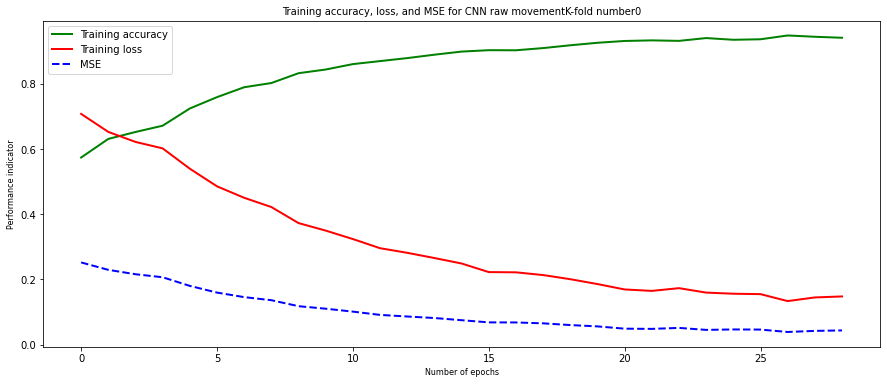

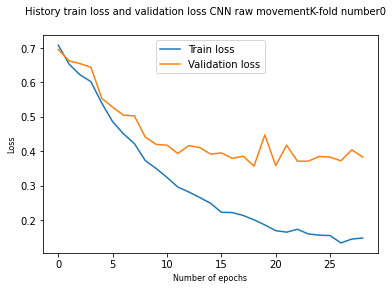

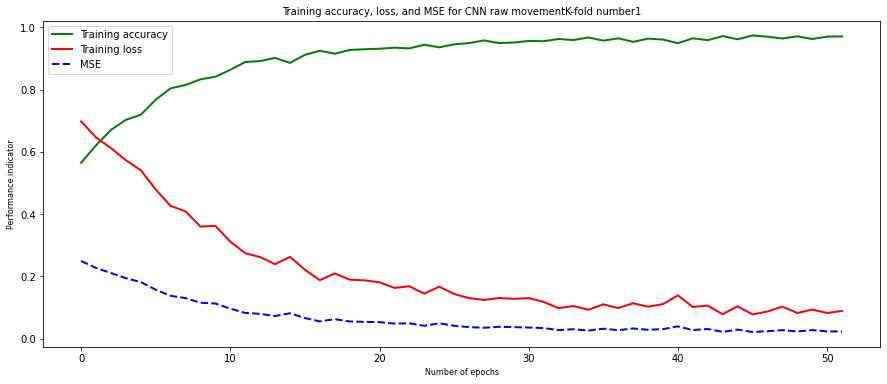

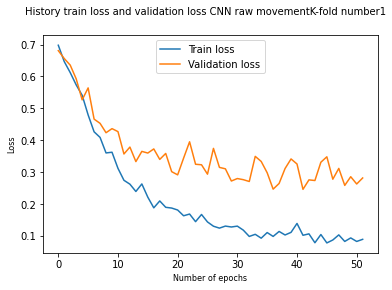

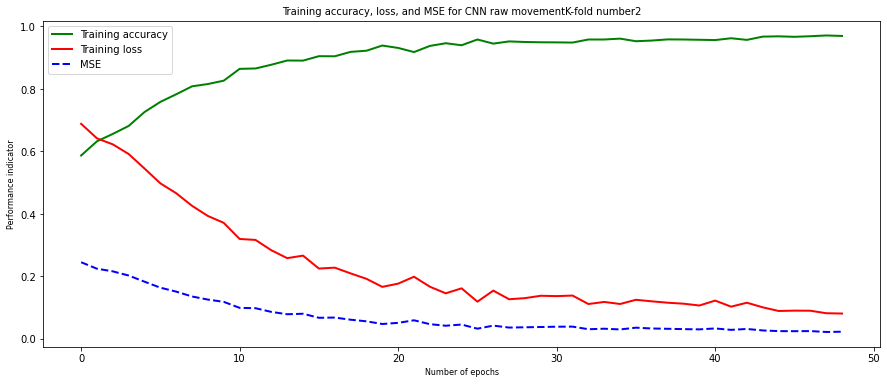

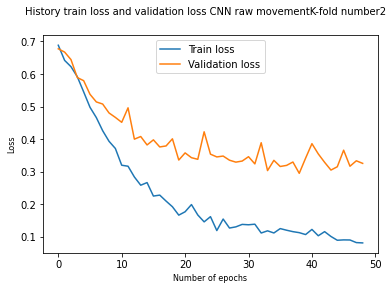

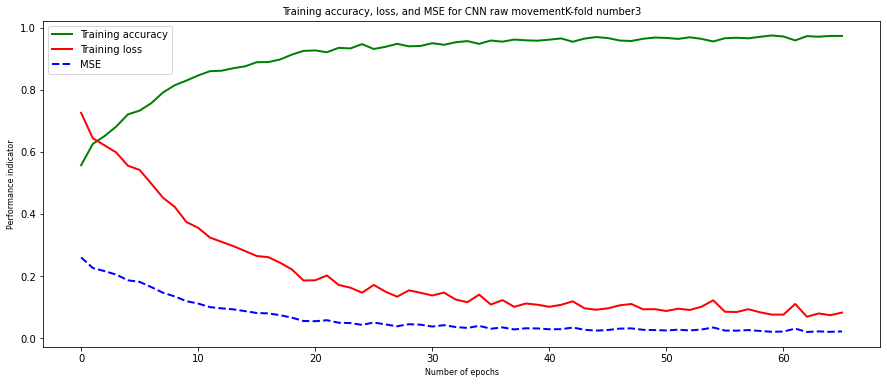

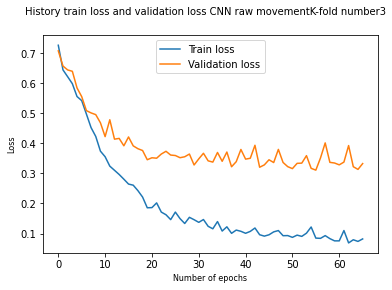

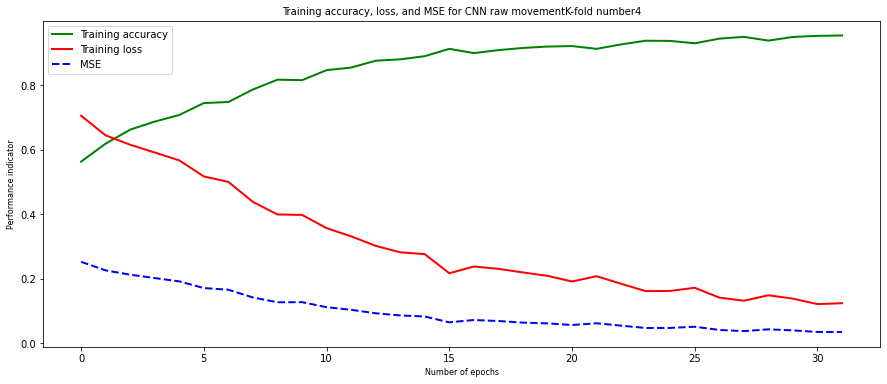

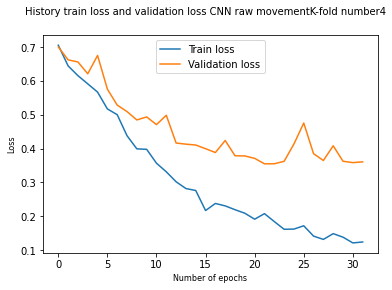

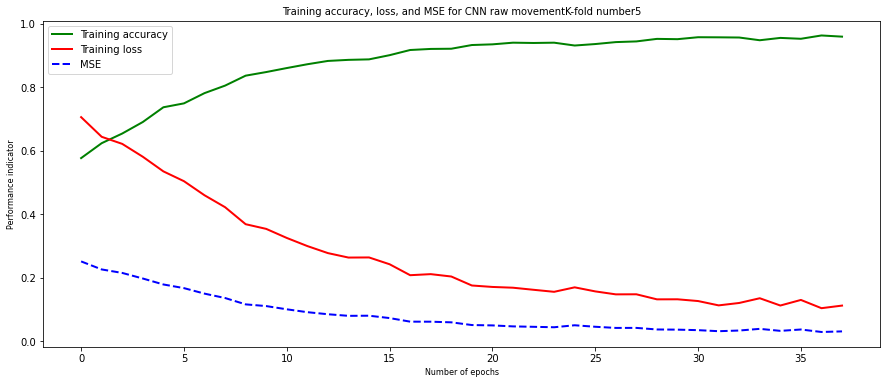

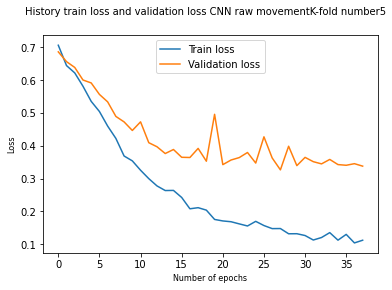

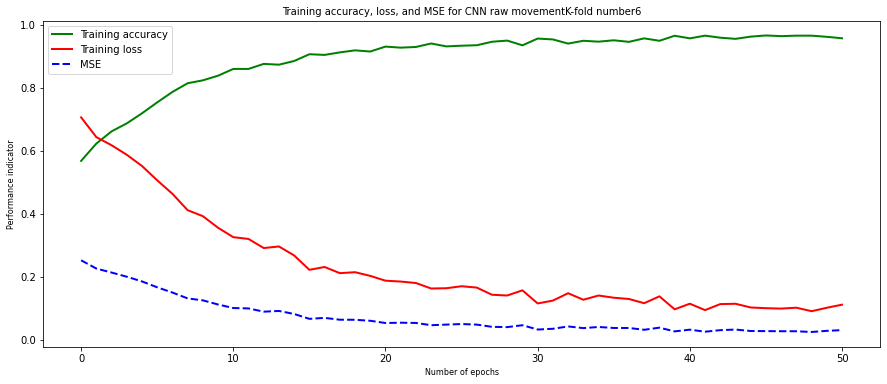

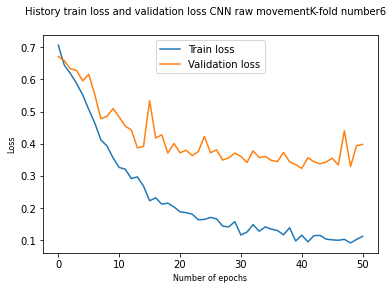

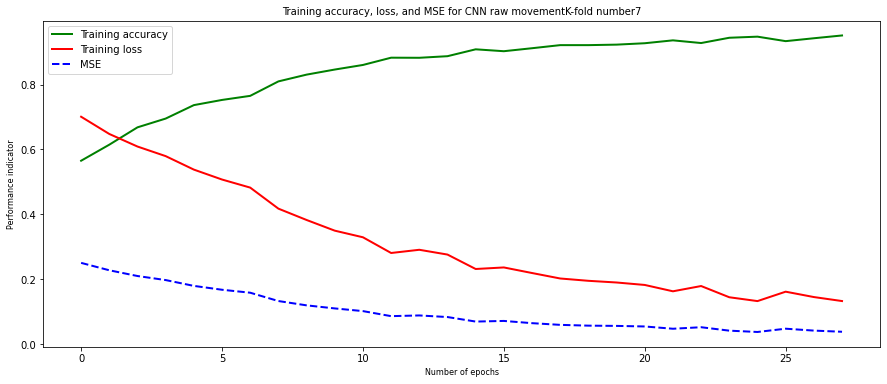

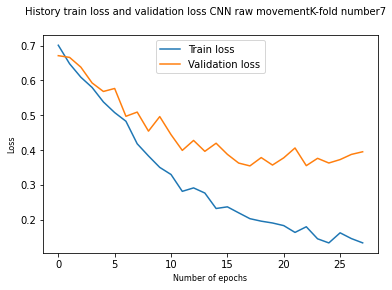

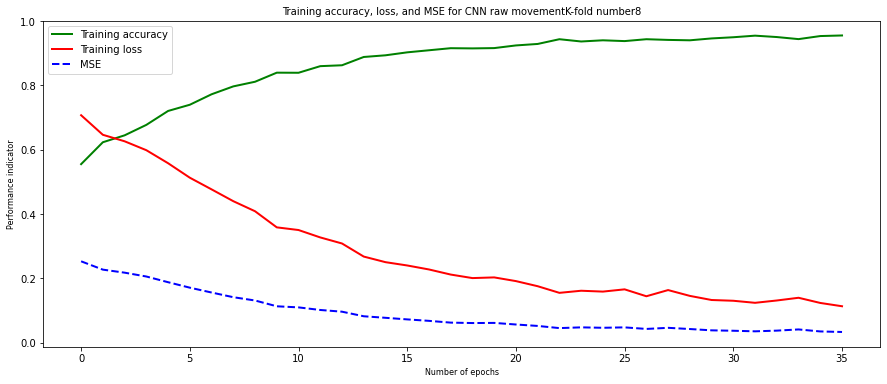

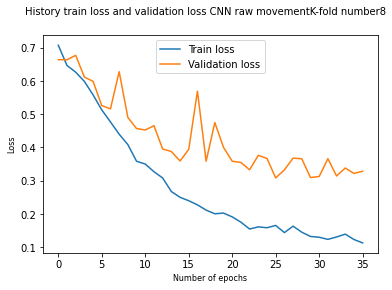

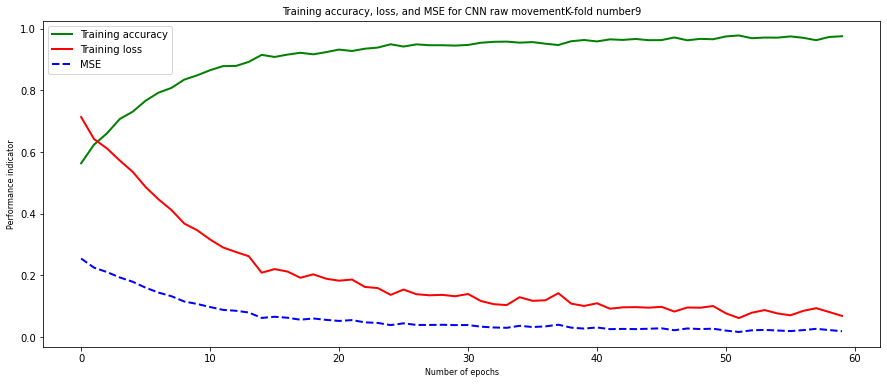

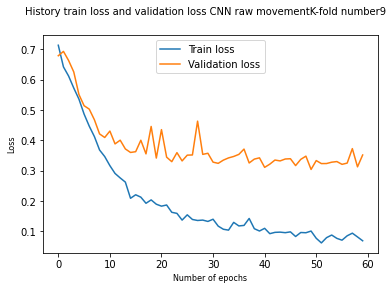

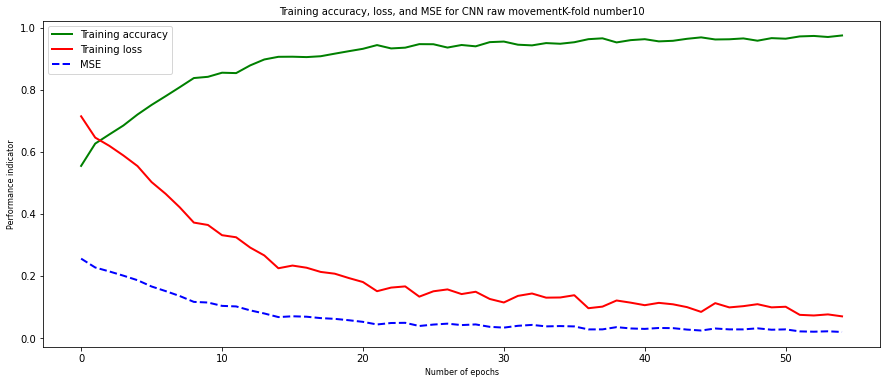

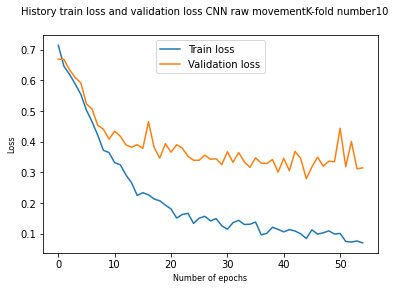

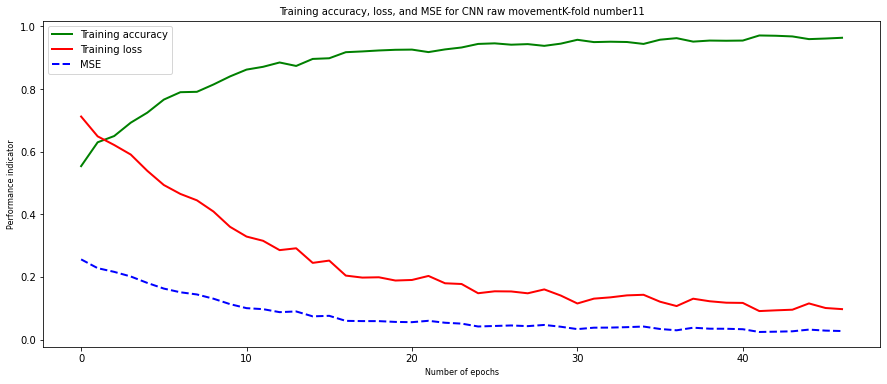

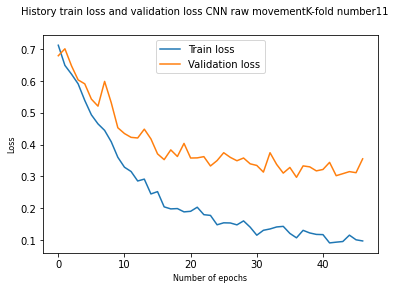

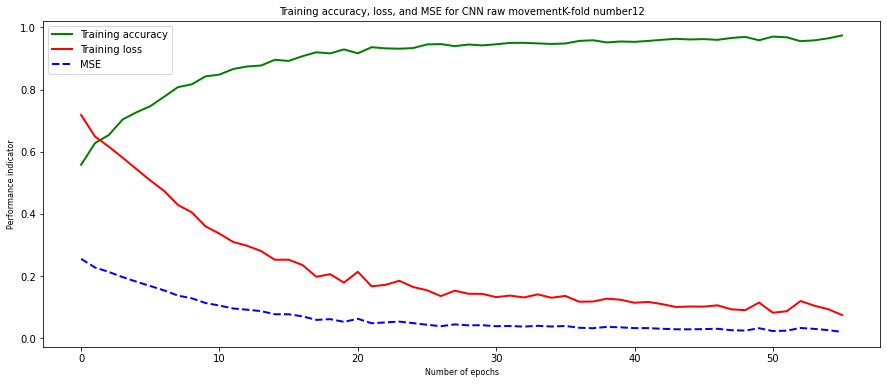

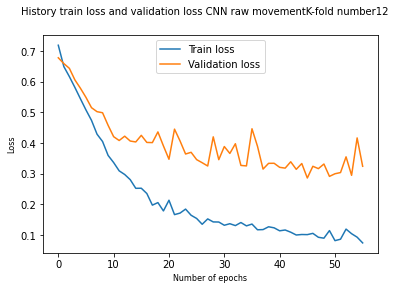

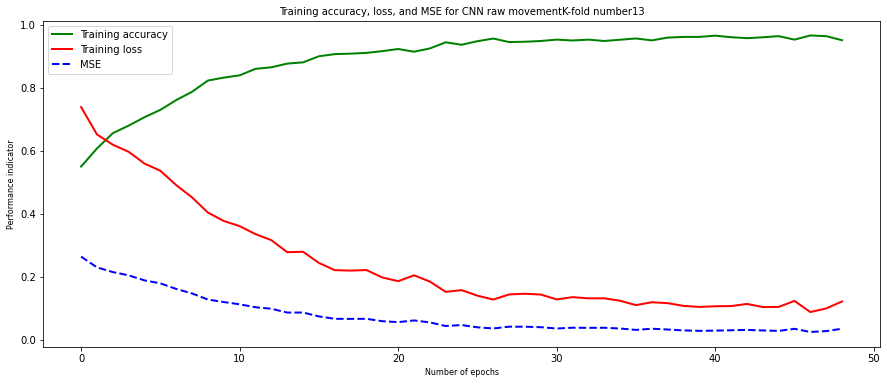

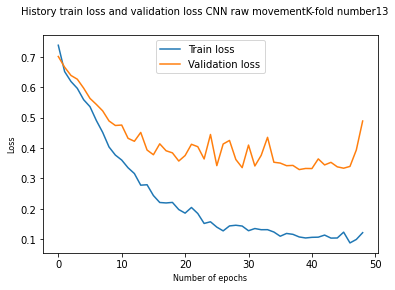

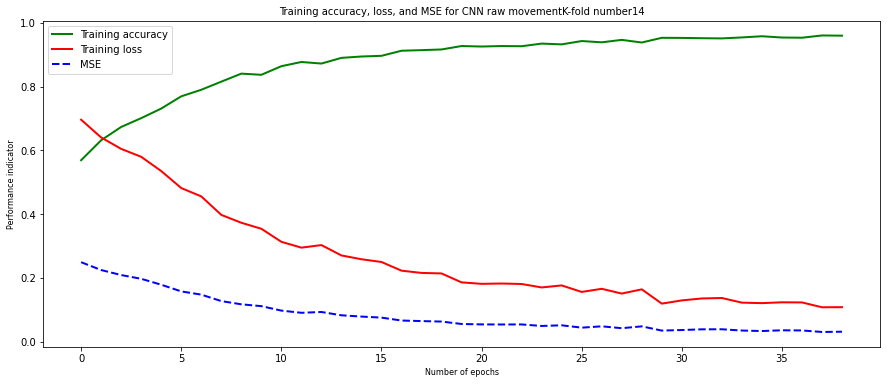

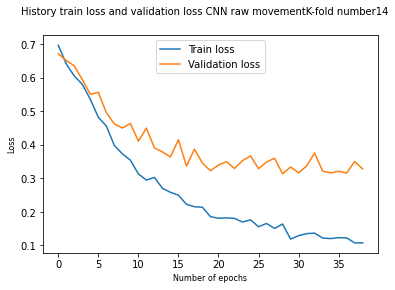

In [ ]:
#Training of CNN
# .....................
nb_channels=58
window_size=W1+W2
training_accuracies=[]
#test_f1score=[]
test_accuracies=[]
files= ['01','02','03','04','05','06','07','08','09','10','11','12','13','14', '15']#LEAVE ONE OUT 15, for test
accuracies={}
histories={}
training_time=[]

for g in range(len(files)):
  train_files= [files[:g]+ files[g+1:]]
  test_file=[files[g]]
  model, es, adam=run_model()

  for file in files:
    
    ###
      REACH_TENSOR, REACH_LABELS = add_data(W1=W1, W2=W2,k=file,event_label=['REACH'],EVENT=503587,nb_channels=nb_channels)
    
      REACH_TENSOR2, REACH_LABELS2 = add_data(W1=W1, W2=W2,k=file,
                                          event_label=['REACH'],EVENT=503588,nb_channels=nb_channels)
    
      GRASP_TENSOR, GRASP_LABELS = add_data(W1=W1, W2=W2,k=file,
                                          event_label=['GRASP'],EVENT=501794,nb_channels=nb_channels) 
      GRASP_TENSOR2, GRASP_LABELS2 = add_data(W1=W1, W2=W2,k=file,
                                          event_label=['GRASP'],EVENT=501795,nb_channels=nb_channels)
    
      try:
          FINAL_TENSOR=numpy.vstack((FINAL_TENSOR,REACH_TENSOR,REACH_TENSOR2, GRASP_TENSOR, GRASP_TENSOR2))
          labels=labels+REACH_LABELS+REACH_LABELS2+GRASP_LABELS+GRASP_LABELS2
        
      except NameError:
          FINAL_TENSOR=numpy.vstack((REACH_TENSOR,REACH_TENSOR2, GRASP_TENSOR, GRASP_TENSOR2))
          labels=REACH_LABELS+REACH_LABELS2+GRASP_LABELS+GRASP_LABELS2

  X_train, X_val, y_train, y_val = train_test_split(FINAL_TENSOR, labels, test_size =0.3, random_state=0)

  X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
  X_val=X_val.reshape(X_val.shape[0],X_val.shape[1],X_val.shape[2],1)

  print("x train shape", X_train.shape)
  print("x val shape", X_val.shape)
  print("y train length", len(y_train))
  print("y train length", len(y_val))

  del FINAL_TENSOR
  del REACH_TENSOR 
  del REACH_LABELS
  del REACH_TENSOR2 
  del REACH_LABELS2
  del GRASP_TENSOR
  del GRASP_LABELS
  del GRASP_TENSOR2
  del GRASP_LABELS2 

  onehot = LabelBinarizer()
  y_train = onehot.fit_transform(y_train)
  y_val = onehot.transform(y_val)
  ####
  start = time.time()
  TITLE= "Training accuracy, loss, and MSE for "+BIG_TITLE+ "K-fold number"+ str(g)

  histories[TITLE]= model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=10, callbacks=[es])#works with epochs = 10
  stop = time.time() 

  training_accuracies.append(histories[TITLE].history['accuracy'])
  training_time.append(stop - start)

  plot_training_history(histories[TITLE], TITLE)

  fig = plt.figure()
  pyplot.plot(histories[TITLE].history['loss'], label='Train loss')
  pyplot.plot(histories[TITLE].history['val_loss'], label='Validation loss')

  TITLE= "History train loss and validation loss "+BIG_TITLE+ "K-fold number"+ str(g)
  fig.suptitle(TITLE, fontsize=10)
  plt.xlabel('Number of epochs', fontsize=8)
  plt.ylabel('Loss', fontsize=8)

  pyplot.legend(loc='upper center')

  plt.savefig(str(TITLE)+'.png', bbox_inches='tight')
  plt.savefig(str(TITLE)+'.pdf', bbox_inches='tight')

  del X_train
  del X_val
  del y_train
  del y_val

###################################
  for file in test_file:
    REACH_TENSOR, REACH_LABELS = add_data(W1=W1, W2=W2,k=file,event_label=['REACH'],EVENT=503587,nb_channels=nb_channels)
    
    REACH_TENSOR2, REACH_LABELS2 = add_data(W1=W1, W2=W2,k=file,
                                         event_label=['REACH'],EVENT=503588,nb_channels=nb_channels)
    
    GRASP_TENSOR, GRASP_LABELS = add_data(W1=W1, W2=W2,k=file,
                                         event_label=['GRASP'],EVENT=501794,nb_channels=nb_channels) 
    GRASP_TENSOR2, GRASP_LABELS2 = add_data(W1=W1, W2=W2,k=file,
                                         event_label=['GRASP'],EVENT=501795,nb_channels=nb_channels)
    try:
        TEST_TENSOR=numpy.vstack((TEST_TENSOR,REACH_TENSOR,REACH_TENSOR2, GRASP_TENSOR, GRASP_TENSOR2))
        labels_test=labels_test+REACH_LABELS+REACH_LABELS2+GRASP_LABELS+GRASP_LABELS2
        
    except NameError:
        TEST_TENSOR=numpy.vstack((REACH_TENSOR,REACH_TENSOR2, GRASP_TENSOR, GRASP_TENSOR2))
        labels_test=REACH_LABELS+REACH_LABELS2+GRASP_LABELS+GRASP_LABELS2

  TEST_TENSOR, labels_test=random_shuffle(TEST_TENSOR, labels_test)
  TEST_TENSOR=TEST_TENSOR.reshape(TEST_TENSOR.shape[0],TEST_TENSOR.shape[1],TEST_TENSOR.shape[2],1)
  y_test = onehot.transform(labels_test)
  print("TEST_TENSOR shape:", TEST_TENSOR.shape)
  print("y test length:", len(y_test))

  test_loss, test_acc, test_mse = model.evaluate(TEST_TENSOR, y_test)
  test_accuracies.append(test_acc)

##storing for ROC curve
  y_pred = model.predict(TEST_TENSOR)
  y_pred_keras=y_pred.ravel()
  fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
  ROC= ["fpr_keras:", fpr_keras, "tpr_keras :", tpr_keras, "thresholds_keras:", thresholds_keras]
##storing for AUC curve
  auc_keras = auc(fpr_keras, tpr_keras)
  AUC= ["auc_keras:", auc_keras]

# Creating the Confusion Matrix
  y_pred_n=[]
  for i in y_pred:
    if i >= 0.5:
      y_pred_n.append(1)
    else:
      y_pred_n.append(0)
  y_pred= y_pred_n
#del y_pred_n
  cm = confusion_matrix(y_test, y_pred)
  print(cm)

  total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
  accuracy1=(cm[0,0]+cm[1,1])/float(total1)
  acc="Accuracy : %f" %(accuracy1*100)
  print("Accuracy : %f" %(accuracy1*100))

  sensitivity1 = float(cm[0,0])/(cm[0,0]+cm[0,1])
  sens="Sensitivity :%f" %(sensitivity1*100)
  print("Sensitivity :%f" %(sensitivity1*100))

  specificity1 = float(cm[1,1])/(cm[1,0]+cm[1,1])
  spe="Specificity :%f"%(specificity1*100)
  print("Specificity :%f"%(specificity1*100))

  precision1 = float(cm[0,0])/(cm[0,0]+cm[1,1])
  pre="Precision :%f" %(precision1*100)
  print("Precision :%f" %(precision1*100))

  #F1score= 2*((precision1*sensitivity1)/(precision1+sensitivity1))
  #test_f1score.append(F1score)

  TITLE= "Test results & training time "+BIG_TITLE+ "K-fold number"+ str(g)


  with open(str(TITLE)+".csv", 'w', newline='', ) as file:
      writer = csv.writer(file)
      writer.writerow(["Test acc:", test_acc])
      writer.writerow(["Test loss:", test_loss])
      writer.writerow(["Test mse:", test_mse])
      writer.writerow(["ROC:", ROC])
      writer.writerow(["AUC:", AUC])
      writer.writerow(["CM:",cm])
      writer.writerow(["accuracy:",acc])
      writer.writerow(["sensitivity/recall:", sens])
      writer.writerow(["specificity:", spe])
      writer.writerow(["precision",pre])
      writer.writerow(["Training time:", training_time])

  del TEST_TENSOR
  del labels_test
  del y_test
  del y_pred


In [ ]:
import math

def variance(data, ddof=0):
  n = len(data)
  mean = sum(data) / n
  return sum((x - mean) ** 2 for x in data) / (n - ddof)

def stdev(data):
  var = variance(data)
  std_dev = math.sqrt(var)
  return std_dev

def Average(lst):
    return sum(lst) / len(lst)

SE_testacc= stdev(test_accuracies)
#SE_testf1= stdev(test_f1score)
Mean_accuracy= Average(test_accuracies)
#Mean_f1score= Average(test_f1score)

with open(str(BIG_TITLE+"SE")+".csv", 'w', newline='', ) as file:
      writer = csv.writer(file)
      writer.writerow(["SE_test accuracy", SE_testacc])
      writer.writerow(["Mean_accuracy", Mean_accuracy])
      #writer.writerow(["SE_test f1score", SE_testf1])
      #writer.writerow(["Mean_f1score", Mean_f1score])

In [ ]:
print("SE acc", SE_testacc*100)
#print("SE F1", SE_testf1*100)

In [ ]:
print("Mean acc", Mean_accuracy*100)
#print("Mean F1 score", Mean_f1score*100)

In [ ]:
test_accuracies

[0.9303797483444214,
 0.9466666579246521,
 0.9556962251663208,
 0.9834437370300293,
 0.921875,
 0.9119496941566467,
 0.9707792401313782,
 0.9156249761581421,
 0.942307710647583,
 0.9058441519737244,
 0.9685534834861755,
 0.9654088020324707,
 0.9711538553237915,
 0.8705036044120789,
 0.9740259647369385]

In [ ]:
#test_f1score